In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import scipy.stats

from Configuration import Configuration
from NeuralTract import NeuralTract

In [2]:
conf = Configuration('confNeuralTractSpikes.rmto')

In [4]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [5]:
pools = []
pools.append(NeuralTract(conf, 'CMExt'))

tic = time.clock()
for i in xrange(0,len(t)-1):
    pools[0].atualizePool(t[i])
toc = time.clock()
print str(toc - tic) + ' seconds'

Descending Command CMExt built
83.381954 seconds


In [6]:
pools[0].listSpikes()

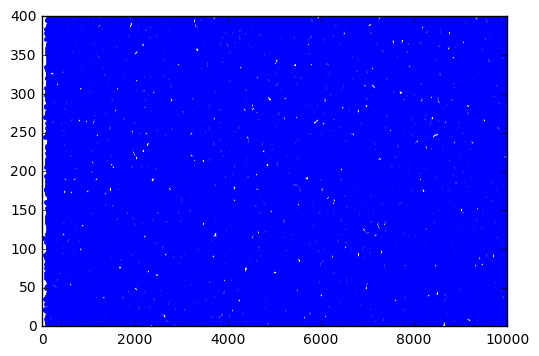

In [7]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')

In [8]:
ISI = np.array([])
for i in xrange(0,len(pools[0].unit)):
    ISI = np.append(ISI, np.diff(np.reshape(np.array(pools[0].unit[i].terminalSpikeTrain), (-1,2))[:,0]))
    

(array([  4.34000000e+02,   4.59600000e+03,   9.10800000e+03,
          7.72400000e+03,   3.76200000e+03,   1.28200000e+03,
          3.71000000e+02,   8.60000000e+01,   1.50000000e+01,
          3.00000000e+00]),
 array([  25.2 ,   63.48,  101.76,  140.04,  178.32,  216.6 ,  254.88,
         293.16,  331.44,  369.72,  408.  ]),
 <a list of 10 Patch objects>)

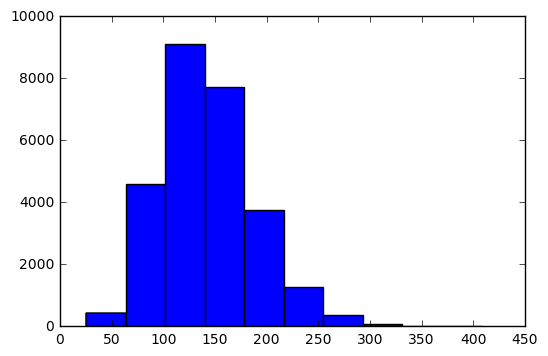

In [9]:
plt.figure()
plt.hist(ISI)

In [10]:
SD = np.std(ISI)
M = np.mean(ISI)
SK = scipy.stats.skew(ISI)
CV = SD / M

print 'ISI Mean = ' + str(M)
print 'ISI Standard deviation = ' + str(SD)
print 'ISI Skewness = ' + str(SK)
print 'ISI CV = ' + str(CV)

ISI Mean = 142.797688178
ISI Standard deviation = 45.1712659927
ISI Skewness = 0.625152094019
ISI CV = 0.316330513253


In [11]:
M_FR = 1000.0 / M
SD_FR = np.sqrt((SD**2) * 1000 / (M**3) + 1/6.0 + (SD**4) / (2*M**4) - SK/(3*M**3))


print 'Firing rate mean = ' + str(M_FR)
print 'Firing rate standard deviation = ' + str(SD_FR)

Firing rate mean = 7.00291449224
Firing rate standard deviation = 0.934034094949


In [12]:
CV_FR = SD_FR / M_FR
print 'CV of Firing rate = ' + str(CV_FR)

CV of Firing rate = 0.133377909438
